# 제 7장 통계분석
#### [깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/tree/main/%EC%A0%9C7%EC%9E%A5_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D)
#### 가상환경에서 패키지 설치 방법
1. Anaconda Prompt (anaconda3) 접속
2. 가상환경 활성화 
    - activate <가상환경 이름(adp_code)>
3. 가상환경이 활성화된 상태에서 패키지 설치
    - pip install <패키지 이름>==<버전>

### t-test
#### 1. 일표본 T-검정

In [1]:
import pandas as pd
cats=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cats.csv')
cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [2]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [5]:
import scipy.stats as stats
from scipy.stats import shapiro
mu = 2.6
shapiro(cats['Bwt']) # 정규성을 만족하지 않으므로 윌콕슨 test 진행

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [6]:
stats.wilcoxon(cats.Bwt - mu, alternative='two-sided') # 0.05보다 작으므로 귀무가설 기각

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

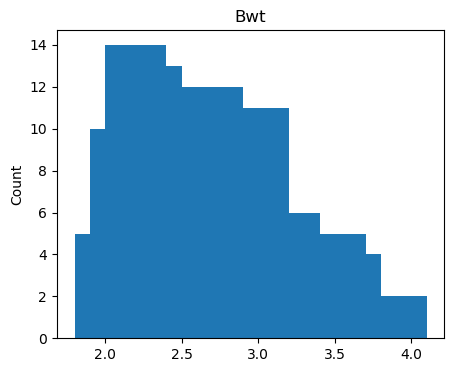

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort=False)
width =0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values,width)
plt.title('Bwt')
plt.ylabel('Count');

#### 2. 대응표본 T-검정
- 귀무가설: 영양제 복용 전후, 수면시간에 차이 없다.
- 대립가설: 영양제 복용 전이 수면시간이 더 길다.

In [12]:
# 데이터 불러오기 및 확인 
import pandas as pd 
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [13]:
stats.ttest_rel(data['after'], data['before'], alternative='greater') # 귀무가설 기각

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082765)

#### 3. 독립표본 T-검정

In [14]:
import pandas as pd
cats=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cats.csv')

female = cats.loc[cats.Sex =='F', 'Bwt']
male = cats.loc[cats.Sex =='M', 'Bwt']
stats.levene(female, male) # 등분산 조건 만족 못 함

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [21]:
stats.ttest_ind(female, male, equal_var=False, alternative='two-sided') # 몸무게 차이 존재함.

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [22]:
print(female.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


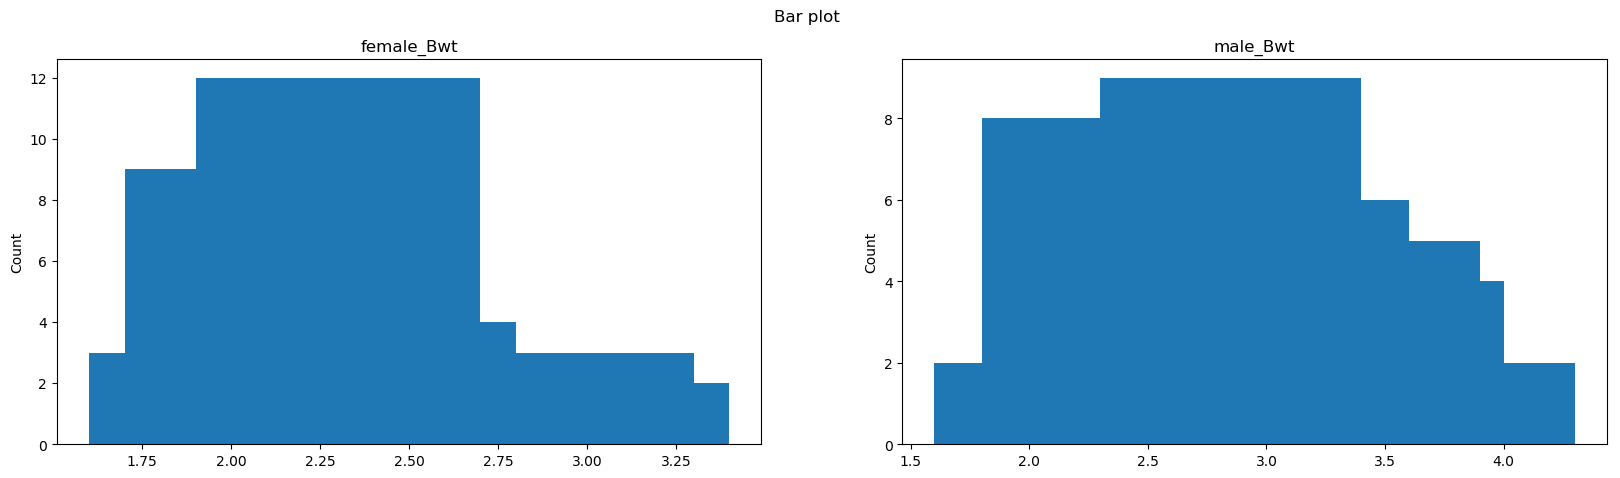

In [19]:
female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)
fig, axs = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Bar plot')
width =0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()

### 분산분석
#### 1. 일원배치 분산분석

In [1]:
import scipy.stats as stats
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
iris.head(100)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [2]:
iris.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
iris.target.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: target, dtype: int64

In [4]:
target_list = iris.target.unique()
setosa = iris[iris.target == target_list[0]]['sepal width']
versicolor = iris[iris.target == target_list[1]]['sepal width']
virginica = iris[iris.target == target_list[2]]['sepal width']
print(target_list)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


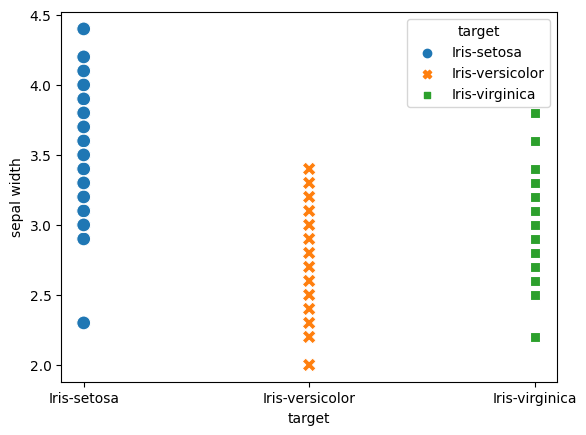

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = 'target', y = 'sepal width', 
                    hue='target', 
                    style='target', # different shapes by group
                    s=100, 
                    data=iris)
plt.show()

In [6]:
# 정규성 검정 -> 모두 정규성을 만족함.
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


In [7]:
# 등분산성 검정 -> 만족함.
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [8]:
# 일원배치 분산분석 -> 귀무가설 기각
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

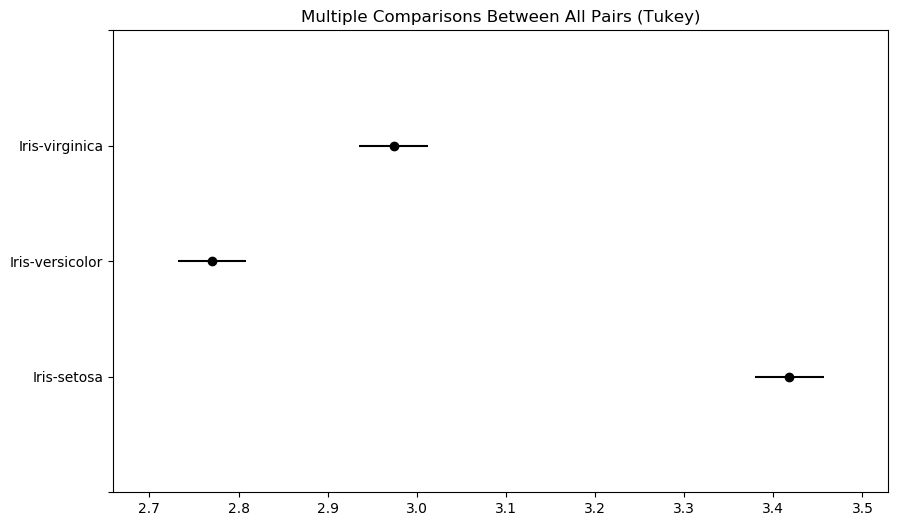

In [18]:
# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(data=iris['sepal width'], groups=iris.target) # MultiComparison: 다중 그룹 간의 통계적 차이를 검정하는 데 사용됨
tuekeyhsd = mc.tukeyhsd(alpha=.5)
fig = tuekeyhsd.plot_simultaneous() # plot_simultaneous: MultiComparison 객체에서 Tukey HSD 분석 결과를 시각화하는 메서드

In [19]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.7246,-0.5714,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.5206,-0.3674,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.1274,0.2806,True


In [20]:
# 정규성 만족 못할 때, 비모수(모집단의 특성을 고려하지 않음) 일원배치 분산분석
stats.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [10]:
# 등분산성 만족 못할 때 일원배치 분산분석
import pingouin as pg
pg.welch_anova(data=iris, dv='sepal width', between='target') # dv: 독립변수, between: 종속변수

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


#### 2. 이원배치 분산분석

In [12]:
import pandas as pd
mtcars = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [13]:
# cyl, am, mpg 변수들로만 구성된 분석용 데이터세트 생성
df = mtcars[['mpg', 'am', 'cyl']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [15]:
# 분산분석 수행
# typ=1: 독립 변수의 순서에 따라 설명 변수의 효과를 평가함, 독립 변수를 추가하는 순서에 따라 설명 변수 간의 상호작용이 발생함.
# typ=2: 독립 변수의 순서에 관계없이 각 독립 변수의 효과를 개별적으로 평가함, 각 독립 변수의 효과를 개별적으로 해석하는 데 유용함
# typ=3: 다른 모든 설명 변수가 이미 모델에 포함된 상태에서 각 독립 변수의 효과를 평가함
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(cyl),2.0,824.784590,412.392295,44.851657,3.725274e-09
C(am),1.0,36.766919,36.766919,3.998759,5.608373e-02
C(cyl):C(am),2.0,25.436511,12.718256,1.383233,2.686140e-01
Residual,26.0,239.059167,9.194583,NaN,NaN


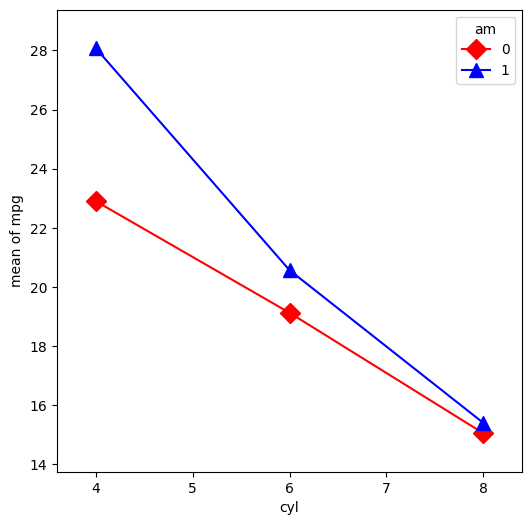

In [18]:
# 교호작용 효과에 대한 시각화
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# 독립변수 cyl, am와 종속변수 mgp를 Series로 변경
cyl = df['cyl']
am = df['am']
mpg = df['mpg']
fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(cyl, am, mpg,          # x1, x2, y 순서대로 작성!
                      colors=['red', 'blue'],
                      markers=['D', '^'],
                      ms=10, ax=ax);